# **TASK - 02**

   Fan  Refrigerator  AirConditioner  Television  Monitor  MotorPump  Month  \
0   16          23.0             2.0         6.0      1.0          0     10   
1   19          22.0             2.0         3.0      1.0          0      5   
2    7          20.0             2.0         6.0      7.0          0      7   
3    7          22.0             3.0        21.0      1.0          0      6   
4   11          23.0             2.0        11.0      1.0          0      2   

        City                                    Company  MonthlyHours  \
0  Hyderabad                    Tata Power Company Ltd.           384   
1   Vadodara                                       NHPC           488   
2     Shimla                            Jyoti Structure           416   
3     Mumbai                            Power Grid Corp           475   
4     Mumbai  Ratnagiri Gas and Power Pvt. Ltd. (RGPPL)           457   

   TariffRate  ElectricityBill  
0         8.4           3225.6  
1         7.8       

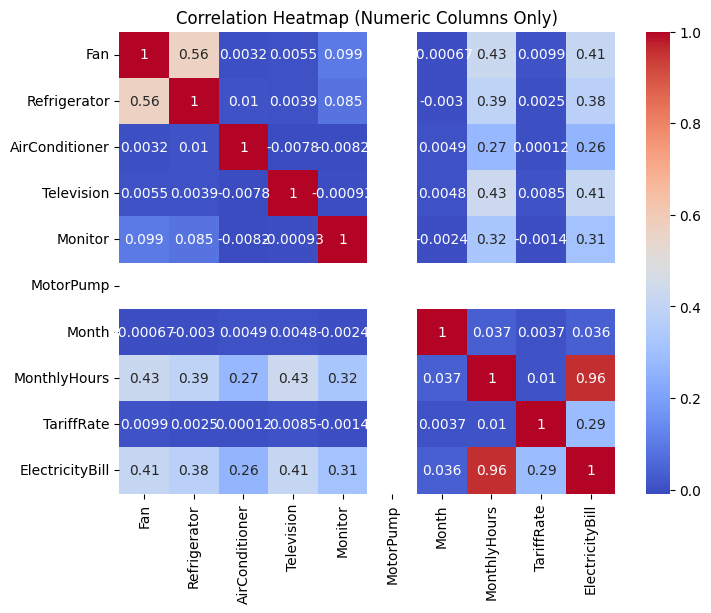

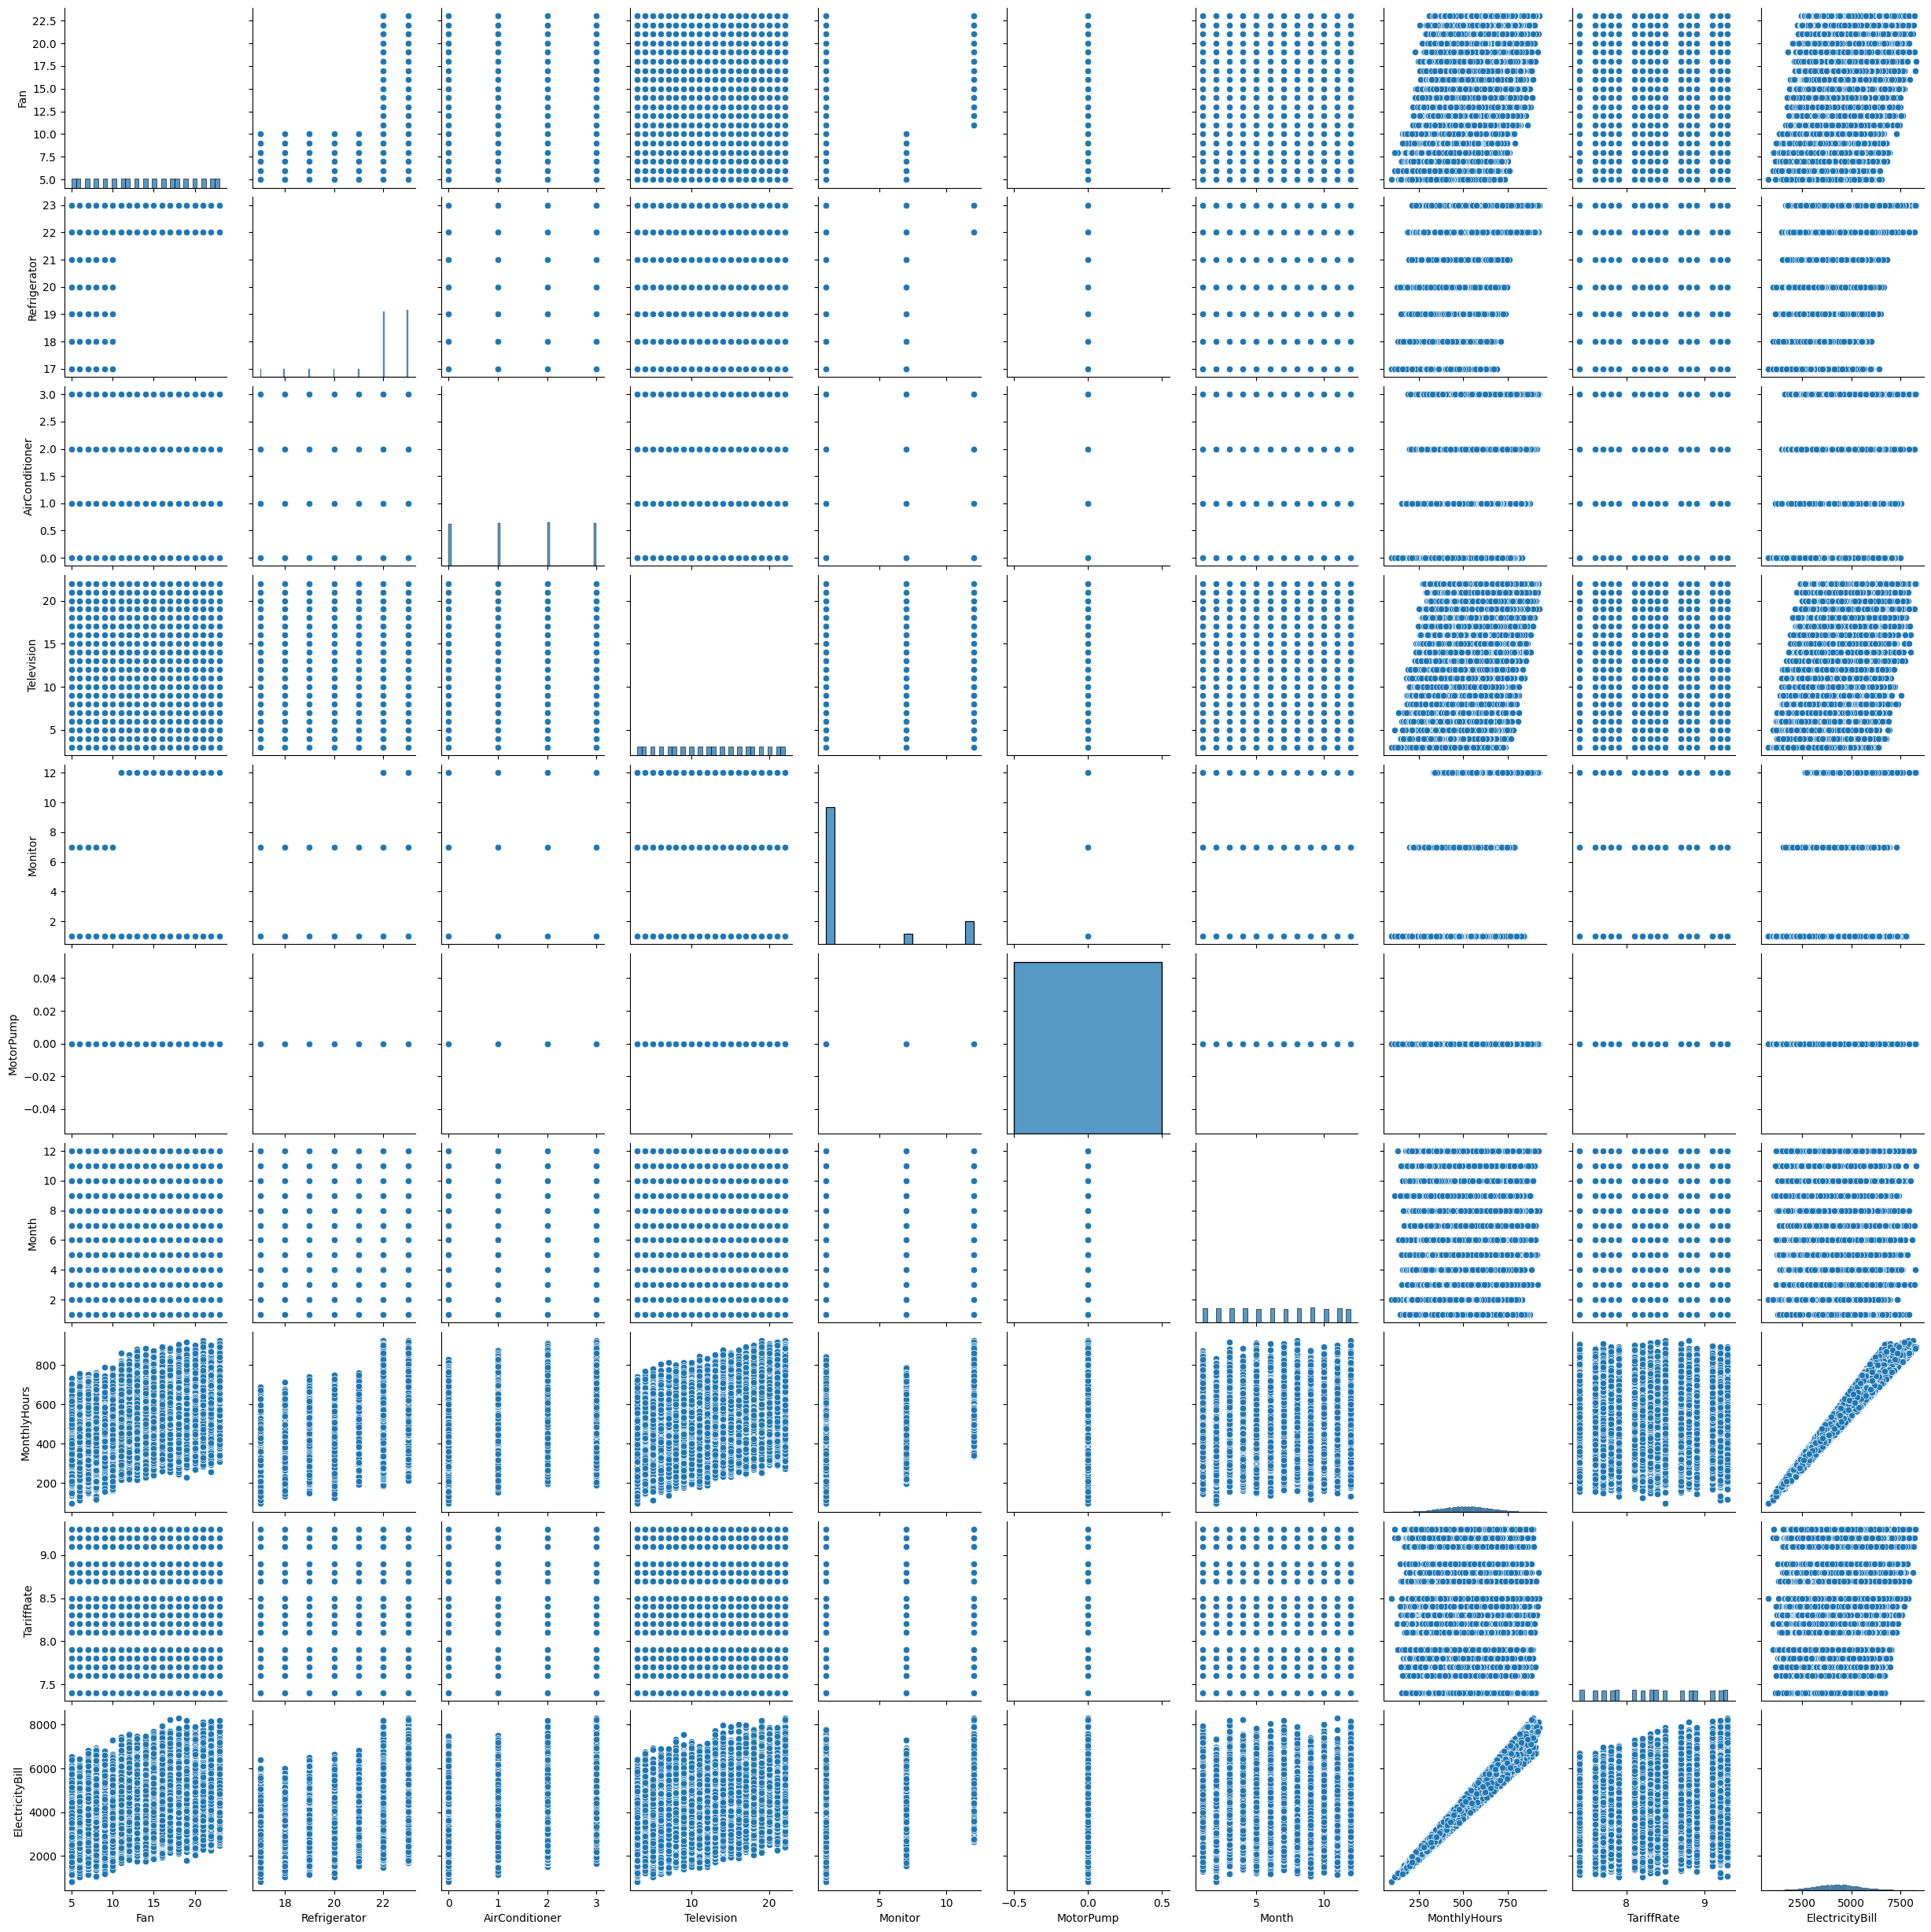

R² Score: 0.9956383663641158
Mean Squared Error: 4969.728188047171


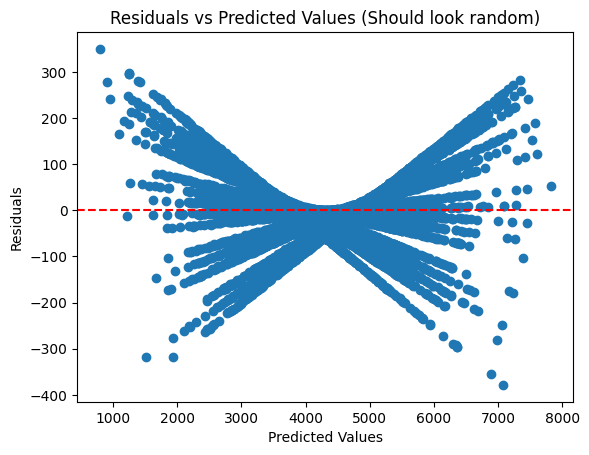

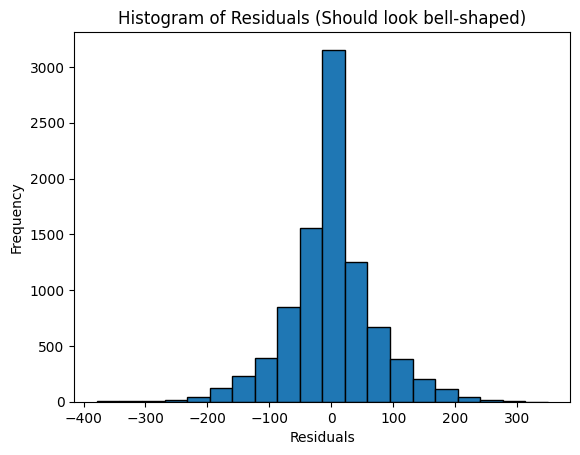

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

df = pd.read_csv("task_02_data.csv")

print(df.head())

numeric_df = df.select_dtypes(include=['number', 'float', 'int'])

plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

sns.pairplot(numeric_df)
plt.show()

X = numeric_df.drop(columns=['ElectricityBill'], errors='ignore')
y = numeric_df['ElectricityBill']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))

residuals = y_test - y_pred

plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values (Should look random)")
plt.show()

plt.hist(residuals, bins=20, edgecolor='black')
plt.title("Histogram of Residuals (Should look bell-shaped)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


After analyzing the dataset, it seems that linear regression isn’t the best fit. Even though the data is numeric and there’s no strong correlation or dependency issue between the variables, the residual vs predicted plot showed a butterfly-shaped pattern. This means the model’s errors aren’t consistent sometimes small, sometimes large which breaks the assumption of constant variance. So, while linear regression could still give a rough idea of the relationships, it wouldn’t be very reliable without some fixes, like transforming the target values or using a more flexible, non-linear model.
Some assumptions are partially satisfied such as Scatter plots showed a general trend but not perfectly straight.
Slight deviation from normal, but not severe. However, there is no multicollinearity and the data is independent.


# **TASK -03**

Linear Regression
Linear regression assumes that there is a straight-line (linear) relationship between the input features and the output. It also assumes that the errors are spread out evenly (same variance), are normally distributed, and that all data points are independent of each other. The features should also not be too closely related to each other.

Decision Tree Classifier
Decision trees don’t assume any special pattern or data type. They just assume that the data can be split into groups based on feature values. They can handle both numbers and categories easily.

K-Nearest Neighbors (KNN)
KNN assumes that similar things are close to each other. It means that data points that are near each other probably belong to the same class. It also assumes that all features are equally important, so the data should be scaled or normalized.

Support Vector Machine (SVM)
SVM assumes that data can be separated by a line (or hyperplane), means it is linearly separable. It also assumes that the data is scaled properly, because large feature values can affect how the line is drawn. It works best when classes are clearly separated.

Random Forest Classifier
Random Forest doesn’t make many assumptions. It just assumes that using many decision trees together will give better and more accurate results than using one tree alone.

# **TASK - 01**

Dataset Shape: (205, 26)

First 5 rows:
   car_ID  symboling                   CarName fueltype aspiration doornumber  \
0       1          3        alfa-romero giulia      gas        std        two   
1       2          3       alfa-romero stelvio      gas        std        two   
2       3          1  alfa-romero Quadrifoglio      gas        std        two   
3       4          2               audi 100 ls      gas        std       four   
4       5          2                audi 100ls      gas        std       four   

       carbody drivewheel enginelocation  wheelbase  ...  enginesize  \
0  convertible        rwd          front       88.6  ...         130   
1  convertible        rwd          front       88.6  ...         130   
2    hatchback        rwd          front       94.5  ...         152   
3        sedan        fwd          front       99.8  ...         109   
4        sedan        4wd          front       99.4  ...         136   

   fuelsystem  boreratio  stroke compres

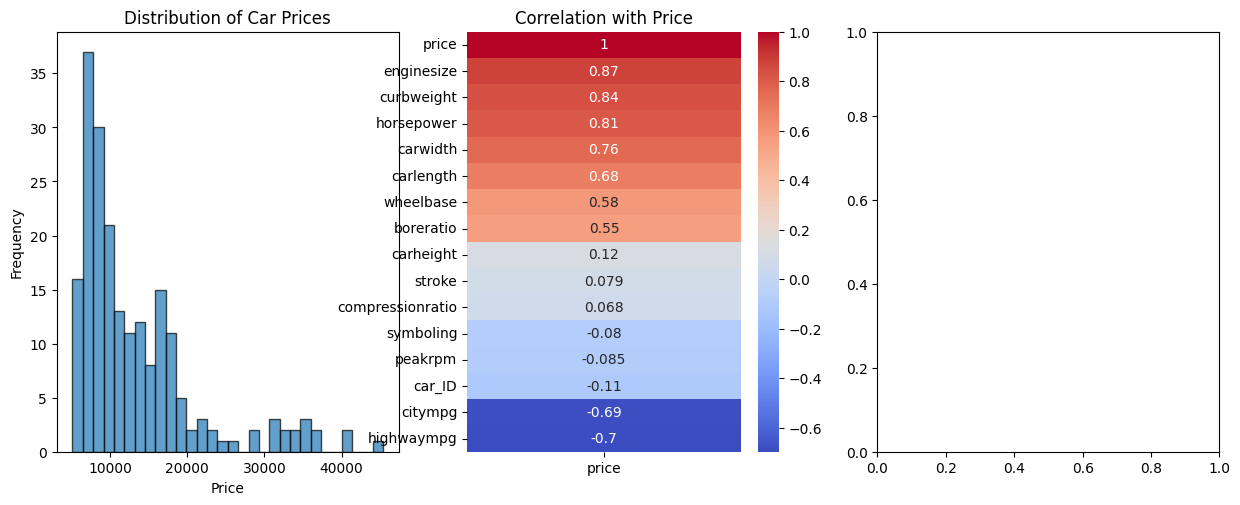

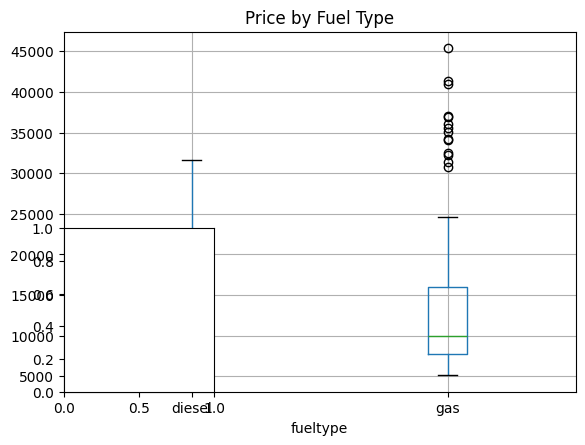

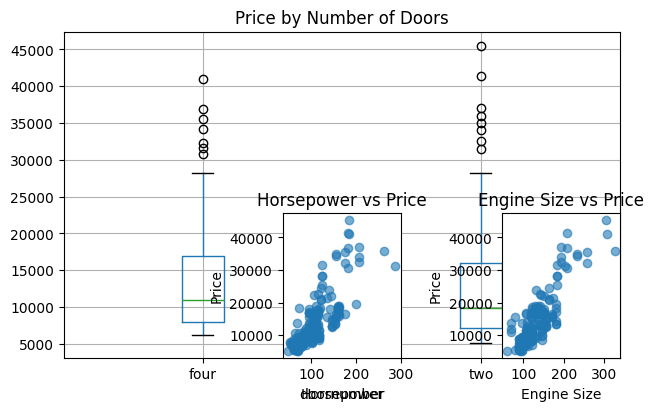


=== DATA PREPROCESSING ===
Selected features: ['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'brand']
Number of features: 24

Training set size: (164, 24)
Testing set size: (41, 24)

=== LINEAR REGRESSION MODEL ===

TRAINING Results:
MAE: 1812.16
MSE: 5483544.70
RMSE: 2341.70
R² Score: 0.9081

TESTING Results:
MAE: 2147.12
MSE: 12683093.85
RMSE: 3561.33
R² Score: 0.8393

Top 10 Most Important Features:
             feature   importance
18  compressionratio  3522.434326
14        enginesize  3205.937370
1           fueltype  3072.624196
6     enginelocation  1530.463745
11        curbweight  1300.271998
9           carwidth  1211.281817
7          wheelbase  1073.346372
23             brand  1058.171759
21           citymp

Text(0.5, 1.0, 'Testing: Actual vs Predicted Prices')

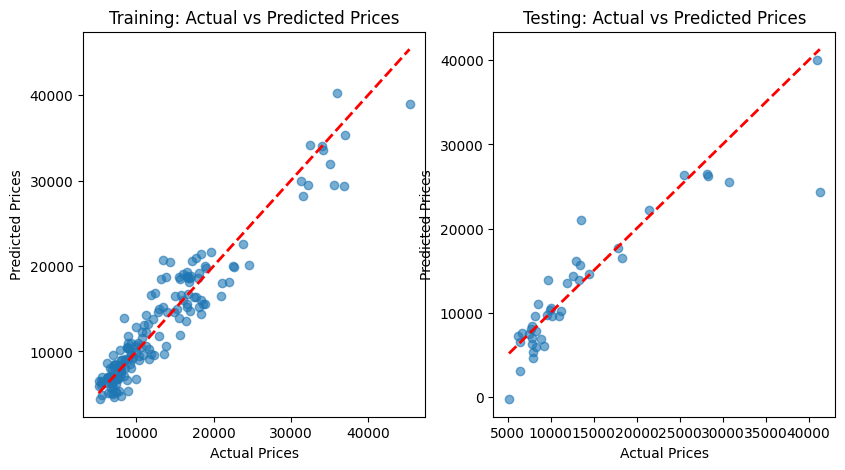

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

df = pd.read_csv('task_01_data.csv')
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nDataset Info:")
print(df.info())

print("\nBasic Statistics:")
print(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())

plt.figure(figsize=(15, 12))

plt.subplot(2, 3, 1)
plt.hist(df['price'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(2, 3, 2)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix[['price']].sort_values(by='price', ascending=False),
            annot=True, cmap='coolwarm')
plt.title('Correlation with Price')

plt.subplot(2, 3, 3)
df.boxplot(column='price', by='fueltype')
plt.title('Price by Fuel Type')
plt.suptitle('')

plt.subplot(2, 3, 4)
df.boxplot(column='price', by='doornumber')
plt.title('Price by Number of Doors')
plt.suptitle('')

plt.subplot(2, 3, 5)
plt.scatter(df['horsepower'], df['price'], alpha=0.6)
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.title('Horsepower vs Price')

plt.subplot(2, 3, 6)
plt.scatter(df['enginesize'], df['price'], alpha=0.6)
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Engine Size vs Price')

plt.tight_layout()
plt.show()

print("\n=== DATA PREPROCESSING ===")

# Create a copy for preprocessing
df_processed = df.copy()

# Extract brand from CarName
df_processed['brand'] = df_processed['CarName'].str.split().str[0]

# Handle categorical variables
categorical_cols = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
                   'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem', 'brand']

label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col].astype(str))
    label_encoders[col] = le

feature_cols = [col for col in df_processed.columns if col not in ['car_ID', 'CarName', 'price']]

print(f"Selected features: {feature_cols}")
print(f"Number of features: {len(feature_cols)}")

X = df_processed[feature_cols]
y = df_processed['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set size: {X_train_scaled.shape}")
print(f"Testing set size: {X_test_scaled.shape}")

print("\n=== LINEAR REGRESSION MODEL ===")

lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

y_train_pred = lr_model.predict(X_train_scaled)
y_test_pred = lr_model.predict(X_test_scaled)

def evaluate_model(y_true, y_pred, dataset_name):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)

    print(f"\n{dataset_name} Results:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.4f}")

    return mae, mse, rmse, r2

print("="*50)
train_metrics = evaluate_model(y_train, y_train_pred, "TRAINING")
print("="*50)
test_metrics = evaluate_model(y_test, y_test_pred, "TESTING")
print("="*50)
feature_importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': abs(lr_model.coef_)
}).sort_values('importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance.head(10))

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.scatter(y_train, y_train_pred, alpha=0.6)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Training: Actual vs Predicted Prices')

plt.subplot(1, 3, 2)
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Testing: Actual vs Predicted Prices')